In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset 

data=pd.read_csv('Ratings_data.csv')

In [3]:
data

Unnamed: 0  Unnamed: 0.1  \
0               0             0   
1               1             1   
2               2             2   
3               3             3   
4               4             4   
...           ...           ...   
25899       12905           475   
25900       12906           476   
25901       12907           477   
25902       12908           478   
25903       12909           479   

                                            Full_reviews  Full_ratings  
0      I had purchased laptop on 18th June 2020 first...             1  
1      Day 1. Laptop showed Bluescreen within an hour...             1  
2      One of the best laptop ever used, android stud...             5  
3      Speed not up to the mark,. No backlit keyboard...             2  
4      Superb quality.. and value for money.. I think...             5  
...                                                  ...           ...  
25899  The 2019 version of iPad mini is a solid devic...             5  
25900  i bought this device not for any specific use ...             5  
25901  This is still a beast even in May 2021 and bou...             5  
25902  This is clearly an expensive product, however ...             5  
25903  My first iPad & second Apple product. As far a...             4  

[25904 rows x 4 columns]

In [4]:
# dropping unnamed column

data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [6]:
data

Full_reviews  Full_ratings
0      I had purchased laptop on 18th June 2020 first...             1
1      Day 1. Laptop showed Bluescreen within an hour...             1
2      One of the best laptop ever used, android stud...             5
3      Speed not up to the mark,. No backlit keyboard...             2
4      Superb quality.. and value for money.. I think...             5
...                                                  ...           ...
25899  The 2019 version of iPad mini is a solid devic...             5
25900  i bought this device not for any specific use ...             5
25901  This is still a beast even in May 2021 and bou...             5
25902  This is clearly an expensive product, however ...             5
25903  My first iPad & second Apple product. As far a...             4

[25904 rows x 2 columns]

In [47]:
# Checking for null values in the dataset

data.isnull().sum()

Full_reviews    1
Full_ratings    0
dtype: int64

We can see there is one null values in the reviews column


In [48]:
# Lets check value counts of the ratings

data['Full_ratings'].value_counts()

5    13124
4     5692
1     3967
3     2007
2     1114
Name: Full_ratings, dtype: int64

We can see the value counts of the data We have more data with 5 rating and less data with 2 rating

In [49]:
# Convert ratings column into integer

data['Full_ratings'].astype('int64')
data['Full_reviews'].astype('object')

0        I had purchased laptop on 18th June 2020 first...
1        Day 1. Laptop showed Bluescreen within an hour...
2        One of the best laptop ever used, android stud...
3        Speed not up to the mark,. No backlit keyboard...
4        Superb quality.. and value for money.. I think...
                               ...                        
25899    The 2019 version of iPad mini is a solid devic...
25900    i bought this device not for any specific use ...
25901    This is still a beast even in May 2021 and bou...
25902    This is clearly an expensive product, however ...
25903    My first iPad & second Apple product. As far a...
Name: Full_reviews, Length: 25904, dtype: object

In [50]:
# lets check dtypes
data.dtypes

Full_reviews    object
Full_ratings     int64
dtype: object

In [51]:
# dropping NAN value column
data.dropna()

Full_reviews  Full_ratings
0      I had purchased laptop on 18th June 2020 first...             1
1      Day 1. Laptop showed Bluescreen within an hour...             1
2      One of the best laptop ever used, android stud...             5
3      Speed not up to the mark,. No backlit keyboard...             2
4      Superb quality.. and value for money.. I think...             5
...                                                  ...           ...
25899  The 2019 version of iPad mini is a solid devic...             5
25900  i bought this device not for any specific use ...             5
25901  This is still a beast even in May 2021 and bou...             5
25902  This is clearly an expensive product, however ...             5
25903  My first iPad & second Apple product. As far a...             4

[25903 rows x 2 columns]

<AxesSubplot:xlabel='Full_ratings', ylabel='count'>

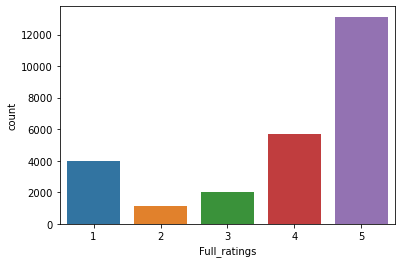

In [52]:
# lets visualize the count of ratings

sns.countplot(data['Full_ratings'])

We can see the count plot of the ratings

In [53]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
# getting length of the each review in dataset

data['length'] = data['Full_reviews'].str.len()
data.head()

Full_reviews  Full_ratings  length
0  I had purchased laptop on 18th June 2020 first...             1   283.0
1  Day 1. Laptop showed Bluescreen within an hour...             1   252.0
2  One of the best laptop ever used, android stud...             5   148.0
3  Speed not up to the mark,. No backlit keyboard...             2   205.0
4  Superb quality.. and value for money.. I think...             5    92.0

# data preprocessing

In [57]:
# Convert all reviews to lower case
data['Full_reviews'] = data['Full_reviews'].str.lower()

# Replace email addresses with 'email'
data['Full_reviews'] = data['Full_reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['Full_reviews'] = data['Full_reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymbols' (£ can by typed with ALT key + 156)
data['Full_reviews'] = data['Full_reviews'].str.replace(r'£|\$', 'dollers')

# Replace numbers with 'numbr'
data['Full_reviews'] = data['Full_reviews'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuations
data['Full_reviews'] = data['Full_reviews'].apply(lambda x: ' '.join(
    term for term in  str(x).split() if term not in string.punctuation))



In [58]:
# Removing stopwords from full reviews column in dataset
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','gud','fn'])
data['Full_reviews'] = data['Full_reviews'].apply(lambda x: ' '.join(
    term for term in  str(x).split() if term not in stop_words))


In [59]:
# Lematization of reviews feature in dataset
lem=WordNetLemmatizer()
data['Full_reviews'] = data['Full_reviews'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in  str(x).split()))

In [60]:
# length of cleaned reviews
data['clean_length'] = data.Full_reviews.str.len()
data.head()

Full_reviews  Full_ratings  length  \
0  purchased laptop numbrth june numbr first day ...             1   283.0   
1  day numbr. laptop showed bluescreen within hou...             1   252.0   
2  one best laptop ever used, android studio, emu...             5   148.0   
3  speed mark,. backlit keyboard,. built cam,. tr...             2   205.0   
4  superb quality.. value money.. think best lapt...             5    92.0   

   clean_length  
0           236  
1           186  
2           132  
3           152  
4            65

In [61]:
# Total length words removad in dataset
print ('Origian Length', data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 3121947.0
Clean Length 2303374


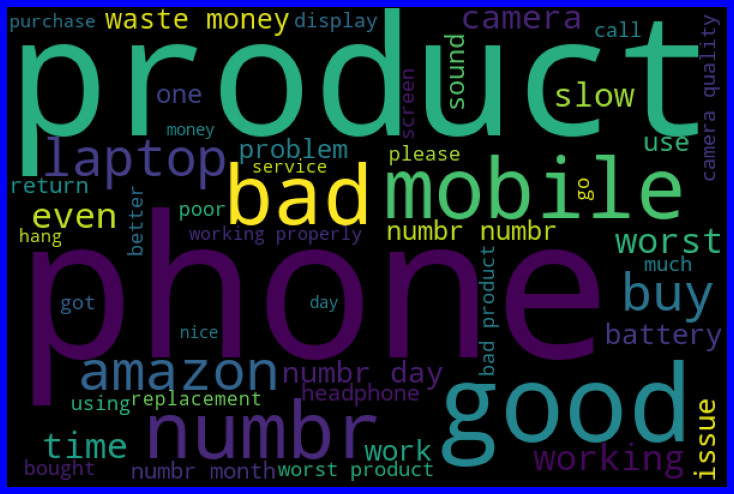

In [62]:
#Getting sense of words in reviews which are 1 rating

from wordcloud import WordCloud
rat1 = data['Full_reviews'][data['Full_ratings']==1]
rat1_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(rat1))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(rat1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see most occuring 50 words in reviews with respect to 1 star rating

We can see mixed words here negative and positive

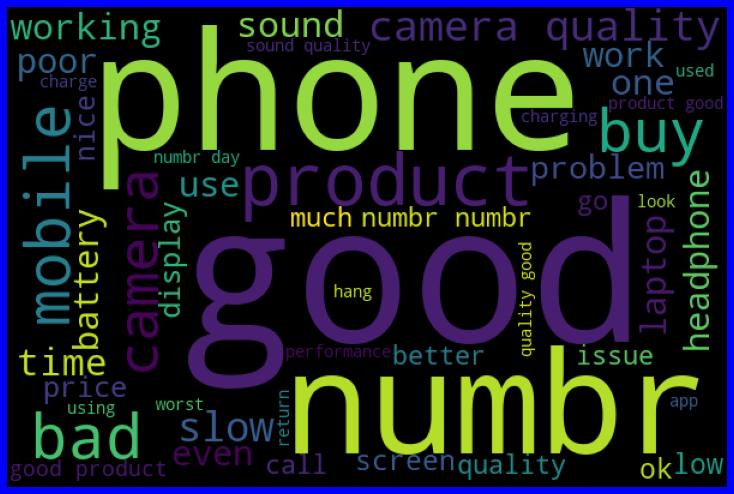

In [63]:
#Getting sense of words in reviews which are 2 rating

from wordcloud import WordCloud
rat1 = data['Full_reviews'][data['Full_ratings']==2]
rat1_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(rat1))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(rat1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see most occuring 50 words in reviews with respect to 2 star rating

We can see some mixed words positive and negative

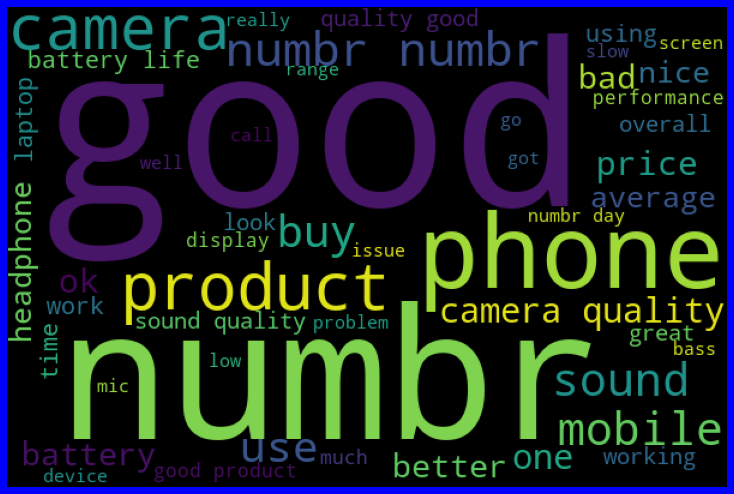

In [64]:
#Getting sense of words in reviews which are 3 rating

from wordcloud import WordCloud
rat1 = data['Full_reviews'][data['Full_ratings']==3]
rat1_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(rat1))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(rat1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see most occuring 50 words in reviews with respect to 3 star rating

We can see all the words seems okay.

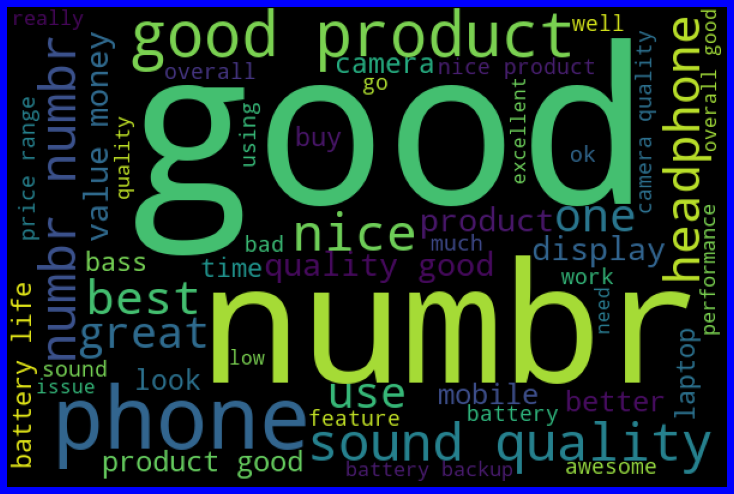

In [65]:
#Getting sense of words in review which are 4 rating

from wordcloud import WordCloud
rat1 = data['Full_reviews'][data['Full_ratings']==4]
rat1_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(rat1))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(rat1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see most occuring 50 words in reviews with respect to 4 star rating

We can see all the words are positive

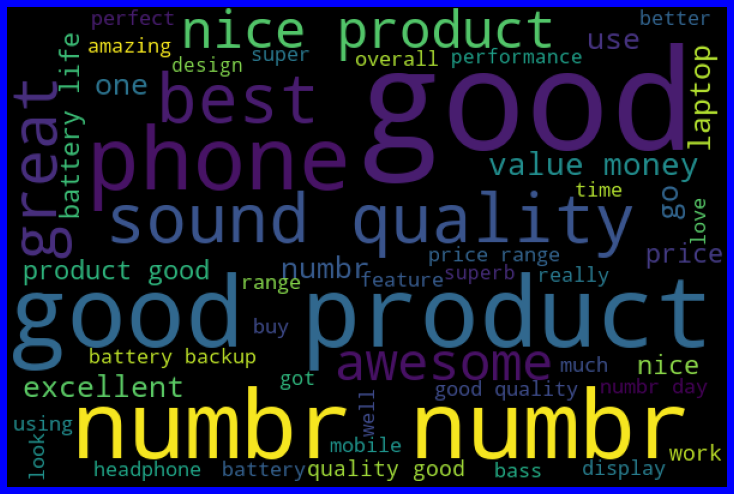

In [66]:
#Getting sense of words in reviews which are 5 rating

from wordcloud import WordCloud
rat1 = data['Full_reviews'][data['Full_ratings']==5]
rat1_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(rat1))
plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(rat1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see most occuring 50 words in reviews with respect to 5 star rating

We can see all the words are positive

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [68]:
# Naive biase multinomial classifier
pipeline = Pipeline([("Tf-idf",TfidfVectorizer( max_features = 10000,stop_words='english')), ("classifier",MultinomialNB())])
X = data['Full_reviews']
y = data['Full_ratings']
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)
pipeline.fit(review_train, rating_train)
pip_pred = pipeline.predict(review_test)
print(accuracy_score(rating_test, pip_pred))
print(confusion_matrix(rating_test, pip_pred))
print(classification_report(rating_test, pip_pred))

0.5606856084002471
[[ 366    0    0    9  648]
 [  50    0    0    2  213]
 [  38    0    0    8  462]
 [  30    0    0   42 1318]
 [  55    0    0   12 3223]]
              precision    recall  f1-score   support

           1       0.68      0.36      0.47      1023
           2       0.00      0.00      0.00       265
           3       0.00      0.00      0.00       508
           4       0.58      0.03      0.06      1390
           5       0.55      0.98      0.70      3290

    accuracy                           0.56      6476
   macro avg       0.36      0.27      0.25      6476
weighted avg       0.51      0.56      0.44      6476



In [69]:
# Support vector classifier
pipeline = Pipeline([("Tf-idf",TfidfVectorizer( max_features = 10000,stop_words='english')), ("classifier",SVC())])
X = data['Full_reviews']
y = data['Full_ratings']
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)
pipeline.fit(review_train, rating_train)
pip_pred = pipeline.predict(review_test)
print(accuracy_score(rating_test, pip_pred))
print(confusion_matrix(rating_test, pip_pred))
print(classification_report(rating_test, pip_pred))

0.6287831995058678
[[ 638    3   18   28  326]
 [ 106   14    4   23  129]
 [  84    0   63   75  248]
 [  65    0   21  301 1047]
 [  96    0   16  115 3056]]
              precision    recall  f1-score   support

           1       0.65      0.63      0.64      1013
           2       0.82      0.05      0.10       276
           3       0.52      0.13      0.21       470
           4       0.56      0.21      0.30      1434
           5       0.64      0.93      0.76      3283

    accuracy                           0.63      6476
   macro avg       0.64      0.39      0.40      6476
weighted avg       0.62      0.63      0.57      6476



In [70]:
# kneighbors classifier
pipeline = Pipeline([("Tf-idf",TfidfVectorizer( max_features = 10000,stop_words='english')), ("classifier",KNeighborsClassifier())])
X = data['Full_reviews']
y = data['Full_ratings']
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)
pipeline.fit(review_train, rating_train)
pip_pred = pipeline.predict(review_test)
print(accuracy_score(rating_test, pip_pred))
print(confusion_matrix(rating_test, pip_pred))
print(classification_report(rating_test, pip_pred))

0.4592340951204447
[[ 302   46   41  189  418]
 [  45   22   15   68  137]
 [  65   30   58  119  228]
 [ 134   47   52  452  722]
 [ 242   94   69  741 2140]]
              precision    recall  f1-score   support

           1       0.38      0.30      0.34       996
           2       0.09      0.08      0.08       287
           3       0.25      0.12      0.16       500
           4       0.29      0.32      0.30      1407
           5       0.59      0.65      0.62      3286

    accuracy                           0.46      6476
   macro avg       0.32      0.29      0.30      6476
weighted avg       0.44      0.46      0.45      6476



In [71]:
# Decision tree  classifier
pipeline = Pipeline([("Tf-idf",TfidfVectorizer( max_features = 10000,stop_words='english')), ("classifier",DecisionTreeClassifier())])
X = data['Full_reviews']
y = data['Full_ratings']
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)
pipeline.fit(review_train, rating_train)
pip_pred = pipeline.predict(review_test)
print(accuracy_score(rating_test, pip_pred))
print(confusion_matrix(rating_test, pip_pred))
print(classification_report(rating_test, pip_pred))

0.5707226683137739
[[ 507   48   68   90  277]
 [  92   37   32   41   96]
 [  80   24  103   90  187]
 [  91   16   73  489  770]
 [ 158   34  114  399 2560]]
              precision    recall  f1-score   support

           1       0.55      0.51      0.53       990
           2       0.23      0.12      0.16       298
           3       0.26      0.21      0.24       484
           4       0.44      0.34      0.38      1439
           5       0.66      0.78      0.72      3265

    accuracy                           0.57      6476
   macro avg       0.43      0.39      0.41      6476
weighted avg       0.54      0.57      0.55      6476



In [72]:
# randomforest  classifier
pipeline = Pipeline([("Tf-idf",TfidfVectorizer( max_features = 10000,stop_words='english')), ("classifier",RandomForestClassifier())])
X = data['Full_reviews']
y = data['Full_ratings']
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)
pipeline.fit(review_train, rating_train)
pip_pred = pipeline.predict(review_test)
print(accuracy_score(rating_test, pip_pred))
print(confusion_matrix(rating_test, pip_pred))
print(classification_report(rating_test, pip_pred))

0.6256948733786288
[[ 557   12   15   50  285]
 [ 113   27    9   14  124]
 [ 104    6   69   53  261]
 [  69    4   17  315 1007]
 [ 119    2   18  142 3084]]
              precision    recall  f1-score   support

           1       0.58      0.61      0.59       919
           2       0.53      0.09      0.16       287
           3       0.54      0.14      0.22       493
           4       0.55      0.22      0.32      1412
           5       0.65      0.92      0.76      3365

    accuracy                           0.63      6476
   macro avg       0.57      0.40      0.41      6476
weighted avg       0.60      0.63      0.57      6476



In [73]:
# adaboost  classifier
pipeline = Pipeline([("Tf-idf",TfidfVectorizer( max_features = 10000,stop_words='english')), ("classifier",AdaBoostClassifier())])
X = data['Full_reviews']
y = data['Full_ratings']
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)
pipeline.fit(review_train, rating_train)
pip_pred = pipeline.predict(review_test)
print(accuracy_score(rating_test, pip_pred))
print(confusion_matrix(rating_test, pip_pred))
print(classification_report(rating_test, pip_pred))

0.560840024706609
[[ 458    6   15   23  464]
 [  85    5    8   14  169]
 [  84    2   18   67  334]
 [  68    5   34  143 1239]
 [ 100    8   17  102 3008]]
              precision    recall  f1-score   support

           1       0.58      0.47      0.52       966
           2       0.19      0.02      0.03       281
           3       0.20      0.04      0.06       505
           4       0.41      0.10      0.16      1489
           5       0.58      0.93      0.71      3235

    accuracy                           0.56      6476
   macro avg       0.39      0.31      0.30      6476
weighted avg       0.49      0.56      0.48      6476



In [74]:
# Gradient boosting  classifier
pipeline = Pipeline([("Tf-idf",TfidfVectorizer( max_features = 10000,stop_words='english')), ("classifier",GradientBoostingClassifier())])
X = data['Full_reviews']
y = data['Full_ratings']
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)
pipeline.fit(review_train, rating_train)
pip_pred = pipeline.predict(review_test)
print(accuracy_score(rating_test, pip_pred))
print(confusion_matrix(rating_test, pip_pred))
print(classification_report(rating_test, pip_pred))

0.5765904879555281
[[ 485    9    6   21  498]
 [  89    5    5   13  172]
 [  70    5   19   56  395]
 [  49   12    9  129 1192]
 [  88    2    1   50 3096]]
              precision    recall  f1-score   support

           1       0.62      0.48      0.54      1019
           2       0.15      0.02      0.03       284
           3       0.47      0.03      0.06       545
           4       0.48      0.09      0.16      1391
           5       0.58      0.96      0.72      3237

    accuracy                           0.58      6476
   macro avg       0.46      0.32      0.30      6476
weighted avg       0.54      0.58      0.49      6476



From above all models random forest classifier giving best accuracy and f1-score

# Cross validation

In [75]:
# Vectorization
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data['Full_reviews'])
X = features
y=data['Full_ratings']

# test train split
review_train, review_test, rating_train, rating_test = train_test_split(X, y, test_size=0.25)

# Cross validation
cvs=cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

cross validation score : 55.40066354716037


# Hyper parameter tuning 

In [76]:
param_grid = {
            'n_estimators' :(40,50,60,70,80,90,100),
            'criterion':('gini','entropy')}

rf = RandomForestClassifier()                       # creating base model

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)

rf_grid.fit(review_train,rating_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': (40, 50, 60, 70, 80, 90, 100)})

In [77]:
rf_grid.best_params_

{'criterion': 'entropy', 'n_estimators': 80}

In [78]:
# Fitting the model with best parameters
rf = RandomForestClassifier(criterion= 'entropy', n_estimators= 80)
rf.fit(review_train,rating_train)
predrf=rf.predict(review_test)
print(accuracy_score(rating_test,predrf))
print(confusion_matrix(rating_test,predrf))
print(classification_report(rating_test,predrf))

0.6198270537368746
[[ 578    5   22   30  344]
 [  96   21    7   20  113]
 [  98    5   82   44  275]
 [  77    2   18  278 1093]
 [  99    5   12   97 3055]]
              precision    recall  f1-score   support

           1       0.61      0.59      0.60       979
           2       0.55      0.08      0.14       257
           3       0.58      0.16      0.25       504
           4       0.59      0.19      0.29      1468
           5       0.63      0.93      0.75      3268

    accuracy                           0.62      6476
   macro avg       0.59      0.39      0.41      6476
weighted avg       0.61      0.62      0.56      6476



# Saving the best model

In [79]:
# I want to save random forest classifier model

import joblib

joblib.dump(rf,'Rating_prediction_model.ob')

['Rating_prediction_model.ob']